In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from monty.serialization import loadfn

In [25]:
batch1 = pickle.load(open(r'.\Data\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [26]:
numBat1 = len(batch1.keys())
numBat1

41

In [27]:
batch2 = pickle.load(open(r'.\Data\batch2.pkl','rb'))

In [28]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [29]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [30]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [31]:
numBat2 = len(batch2.keys())
numBat2

43

In [32]:
batch3 = pickle.load(open(r'.\Data\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

In [33]:
numBat3 = len(batch3.keys())
numBat3

40

In [34]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

In [35]:
bat_dict = {**batch1, **batch2, **batch3}

Text(0, 0.5, 'Discharge Capacity (Ah)')

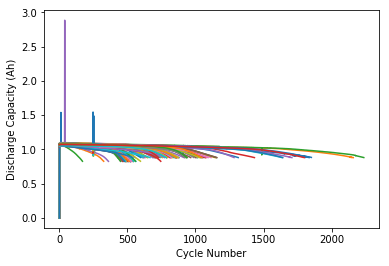

In [36]:
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

### Train and Test Split
If you are interested in using the same train/test split as the paper, use the indices specified below

In [37]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat);

In [38]:
train_ind, test_ind, secondary_test_ind

(array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
        69, 71, 73, 75, 77, 79, 81]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
        68, 70, 72, 74, 76, 78, 80, 82, 83]),
 array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
        123]))

In [39]:
bat_dict.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45', 'b2c0', 'b2c1', 'b2c2', 'b2c3', 'b2c4', 'b2c5', 'b2c6', 'b2c10', 'b2c11', 'b2c12', 'b2c13', 'b2c14', 'b2c17', 'b2c18', 'b2c19', 'b2c20', 'b2c21', 'b2c22', 'b2c23', 'b2c24', 'b2c25', 'b2c26', 'b2c27', 'b2c28', 'b2c29', 'b2c30', 'b2c31', 'b2c32', 'b2c33', 'b2c34', 'b2c35', 'b2c36', 'b2c37', 'b2c38', 'b2c39', 'b2c40', 'b2c41', 'b2c42', 'b2c43', 'b2c44', 'b2c45', 'b2c46', 'b2c47', 'b3c0', 'b3c1', 'b3c3', 'b3c4', 'b3c5', 'b3c6', 'b3c7', 'b3c8', 'b3c9', 'b3c10', 'b3c11', 'b3c12', 'b3c13', 'b3c14', 'b3c15', 'b3c16', 'b3c17', 'b3c18', 'b3c19', 'b3c20', 'b3c21', 'b3c22', 'b3c24', 'b3c25', 'b3c26', 'b3c27', 'b3c28', 'b3c29', 'b3c30

In [ ]:
#cell_dict = {'cycle_life': cl, 'charge_policy':policy, 'summary': summary, 'cycles': cycle_dict}
bat_dict['b1c36']

Just some commands to check the data

In [ ]:
# bat_dict['b1c36']['summary']
# bat_dict['b1c36']['cycles']['0']
# bat_dict['b1c36']['cycles']['1']
# bat_dict[kys[36]]['cycles']['100']
# sum(bat_dict['b1c36']['cycles']['0']['T']) == sum([0,0])
int(bat_dict['b1c36']['cycle_life'])

Where we run through each batch and return a csv to get the cycle data

In [66]:
new_dtypes = {'datetime': np.float32, 'test_time':np.float32, 
              'step_index':np.int16,
              'cycle_index': np.int32, 'current':np.float32,
              'voltage': np.float32, 
              'charge_capacity': np.float64,
              'discharge_capacity': np.float64,
              'charge_energy':np.float64, 
              'discharge_energy':np.float64, 
              'temperature':np.float32,
              'internal_resistance':np.float32}

kys = list(bat_dict.keys())

for i in range(3, len(kys[:45])):
    print(i)
    cycles = int(bat_dict[kys[i]]['cycle_life'])
    df_cycle = pd.DataFrame()
    summs = pd.DataFrame(bat_dict[kys[i]]['summary'])
    summs = summs.drop(["QC", "QD", "Tavg", "Tmin", "Tmax", "chargetime"], axis=1)
    if sum(bat_dict[kys[i]]['cycles']['0']['T']) == sum([0,0]):
        bat_dict[kys[i]]['cycles']['0']['T'] += 20
    for j in range(1, cycles-1):
        if 'Qdlin' in list(bat_dict[kys[i]]['cycles'][str(j)]):
            del bat_dict[kys[i]]['cycles'][str(j)]['Qdlin']
        if 'Tdlin' in list(bat_dict[kys[i]]['cycles'][str(j)]):
            del bat_dict[kys[i]]['cycles'][str(j)]['Tdlin']
        if 'dQdV' in list(bat_dict[kys[i]]['cycles'][str(j)]):
            del bat_dict[kys[i]]['cycles'][str(j)]['dQdV']

        bat_dict[kys[i]]['cycles'][str(j)]['cycle'] = [float(j)]*len(bat_dict[kys[i]]['cycles'][str(j)]['I'])
        df_cycle = df_cycle.append(pd.DataFrame(bat_dict[kys[i]]['cycles'][str(j)]).merge(summs, on='cycle'))
        
    df_cycle['stepindex'] = 0
    df_cycle['charge_energy'] = 0
    df_cycle['discharge_energy'] = 0
    df_cycle['test_time'] = 0
    df_cycle = df_cycle.rename(columns={'t':'datetime',
                                        'stepindex':'step_index',
                                        'cycle':'cycle_index',
                                        'I': 'current', 
                                        'V':'voltage',
                                        'Qc':'charge_capacity', 
                                        'Qd':'discharge_capacity',
                                        'IR':'internal_resistance',
                                        'T':'temperature',
                                       })
    
    df_cycle = df_cycle.astype(new_dtypes)
    label = kys[i]
    batch = label[:2]
    ch = label[3:]
    if len(label[3:]) < 2:
        ch = "0" + ch[-1]
    filename = "./data2/" + batch + "_" + "CH" + ch + ".csv"
    df_cycle.to_csv(filename, index=False)


3
      current  charge_capacity  discharge_capacity  temperature   voltage  \
0    0.000000         0.000000            0.000000    29.985693  2.020849   
1    0.239882         0.000001            0.000000    29.958551  2.034383   
2    0.439447         0.000001            0.000000    29.958551  2.051810   
3    0.559694         0.000001            0.000000    29.958551  2.064978   
4    0.679867         0.000001            0.000000    29.958551  2.080203   
..        ...              ...                 ...          ...       ...   
898 -0.020677         0.880500            0.880124    30.102274  2.000283   
899 -0.019997         0.880500            0.880125    30.102274  2.000435   
900 -0.019997         0.880500            0.880125    30.102274  2.001924   
901 -0.019997         0.880500            0.880125    30.102274  2.011944   
902  0.000000         0.880500            0.880125    30.102274  2.017380   

      datetime  cycle_index  step_index  charge_energy  discharge_energy 

KeyboardInterrupt: 

In [67]:
import os
os.environ["BEEP_ENV"] = "dev"
os.environ["BEEP_PROCESSING_DIR"] ="data2" # whatever folder the new .csv files are in

Extracting the feautres from the new .csv files using the beep library

In [45]:
import json
import glob

# Import beep scripts
from beep import validate, structure, featurize
data_dir = './data2/'

file_list = glob.glob(os.path.join(data_dir, '*[0-9].csv'))
print(file_list)
mode = 'events_off'
mapped  =  {
            "mode": 'events_off',  # mode run|test|events_off
            "file_list": file_list,  # list of file paths ['path/test1.csv', 'path/test2.csv']
            'run_list': list(range(len(file_list)))  # list of run_ids [0, 1]
            }
mapped = json.dumps(mapped)
print(mapped)
#Validation
validated = validate.validate_file_list_from_json(mapped)
validated_output = json.loads(validated)
validated_output['mode'] = mode  # mode run|test|events_off
validated_output['run_list'] = list(range(len(validated_output['file_list'])))
validated = json.dumps(validated_output)

print(validated)

# Data structuring
structured = structure.process_file_list_from_json(validated)
structured_output = json.loads(structured)
structured_output['mode'] = mode  # mode run|test|events_off
structured_output['run_list'] = list(range(len(file_list)))
structured = json.dumps(structured_output)

print(structured)

# Featurization
featurized = featurize.process_file_list_from_json(structured)
featurized_output = json.loads(featurized)
featurized_output['mode'] = mode  # mode run|test|events_off
featurized_output['run_list'] = list(range(len(file_list)))
featurized = json.dumps(featurized_output)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

['./data2\\b1_CH00.csv', './data2\\b1_CH01.csv', './data2\\b1_CH02.csv']
{"mode": "events_off", "file_list": ["./data2\\b1_CH00.csv", "./data2\\b1_CH01.csv", "./data2\\b1_CH02.csv"], "run_list": [0, 1, 2]}


c:\users\mattm\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.79s/it]
--- Logging error ---
Traceback (most recent call last):
  File "c:\users\mattm\appdata\local\programs\python\python36\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "c:\users\mattm\appdata\local\programs\python\python36\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "c:\users\mattm\appdata\local\programs\python\python36\lib\logging\__init__.py", line 578, in format
    s = self.formatMessage(record)
  File "c:\users\mattm\appdata\local\programs\python\python36\lib\logging\__init__.py", line 547, in formatMessage
    return self._style.format(record)
  Fi

{"file_list": ["./data2\\b1_CH00.csv", "./data2\\b1_CH01.csv", "./data2\\b1_CH02.csv"], "run_list": [0, 1, 2], "validity": ["valid", "valid", "valid"], "message_list": [{"comment": "", "error": ""}, {"comment": "", "error": ""}, {"comment": "", "error": ""}], "mode": "events_off"}


--- Logging error ---
Traceback (most recent call last):
  File "c:\users\mattm\appdata\local\programs\python\python36\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "c:\users\mattm\appdata\local\programs\python\python36\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "c:\users\mattm\appdata\local\programs\python\python36\lib\logging\__init__.py", line 578, in format
    s = self.formatMessage(record)
  File "c:\users\mattm\appdata\local\programs\python\python36\lib\logging\__init__.py", line 547, in formatMessage
    return self._style.format(record)
  File "c:\users\mattm\appdata\local\programs\python\python36\lib\logging\__init__.py", line 391, in format
    return self._fmt % record.__dict__
KeyError: 'service'
Call stack:
  File "c:\users\mattm\appdata\local\programs\python\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\mattm\appdata\local\programs\python\pytho

100%|██████████████████████████████████████████████████████████████████████████████| 2158/2158 [00:35<00:00, 61.27it/s]
--- Logging error ---
Traceback (most recent call last):
  File "c:\users\mattm\appdata\local\programs\python\python36\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "c:\users\mattm\appdata\local\programs\python\python36\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "c:\users\mattm\appdata\local\programs\python\python36\lib\logging\__init__.py", line 578, in format
    s = self.formatMessage(record)
  File "c:\users\mattm\appdata\local\programs\python\python36\lib\logging\__init__.py", line 547, in formatMessage
    return self._style.format(record)
  File "c:\users\mattm\appdata\local\programs\python\python36\lib\logging\__init__.py", line 391, in format
    return self._fmt % record.__dict__
KeyError: 'service'
Call stack:
  File "c:\users\mattm\appdata\local\programs\python\python36\lib\runpy.py

{"file_list": ["C:\\Users\\mattm\\Documents\\CalPoly\\DATA 451\\Practice Notebooks\\data-driven-prediction-of-battery-cycle-life-before-capacity-degradation\\data2\\data-share\\structure\\b1_CH00_structure.json", "C:\\Users\\mattm\\Documents\\CalPoly\\DATA 451\\Practice Notebooks\\data-driven-prediction-of-battery-cycle-life-before-capacity-degradation\\data2\\data-share\\structure\\b1_CH01_structure.json", "C:\\Users\\mattm\\Documents\\CalPoly\\DATA 451\\Practice Notebooks\\data-driven-prediction-of-battery-cycle-life-before-capacity-degradation\\data2\\data-share\\structure\\b1_CH02_structure.json"], "run_list": [0, 1, 2], "result_list": ["success", "success", "success"], "message_list": [{"comment": "", "error": ""}, {"comment": "", "error": ""}, {"comment": "", "error": ""}], "invalid_file_list": [], "mode": "events_off"}


In [ ]:
featurized